In [220]:
import numpy as np
from PIL import Image, ImageFilter, ImageChops 
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl



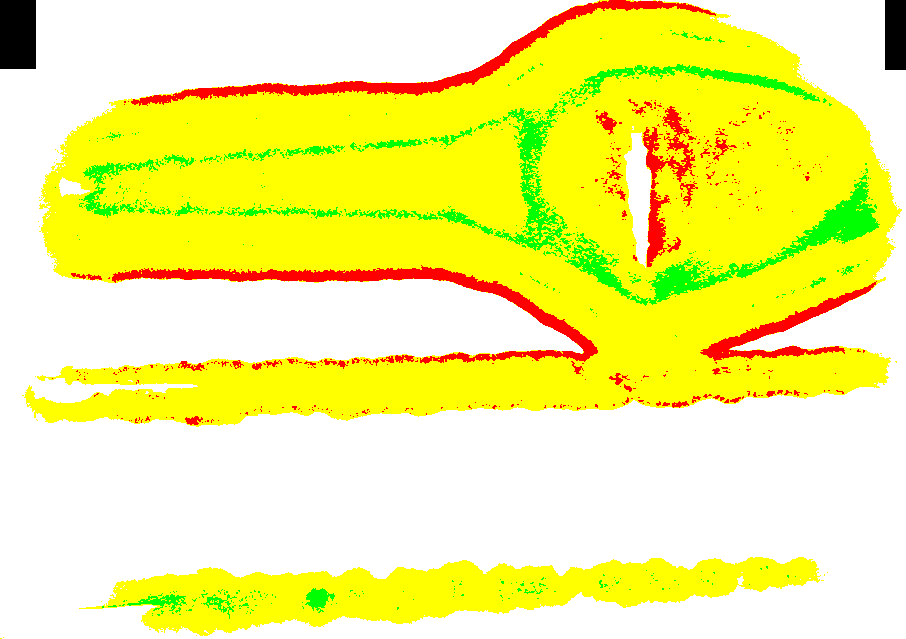

In [221]:
image = Image.open('crocodile.png')
display(image)

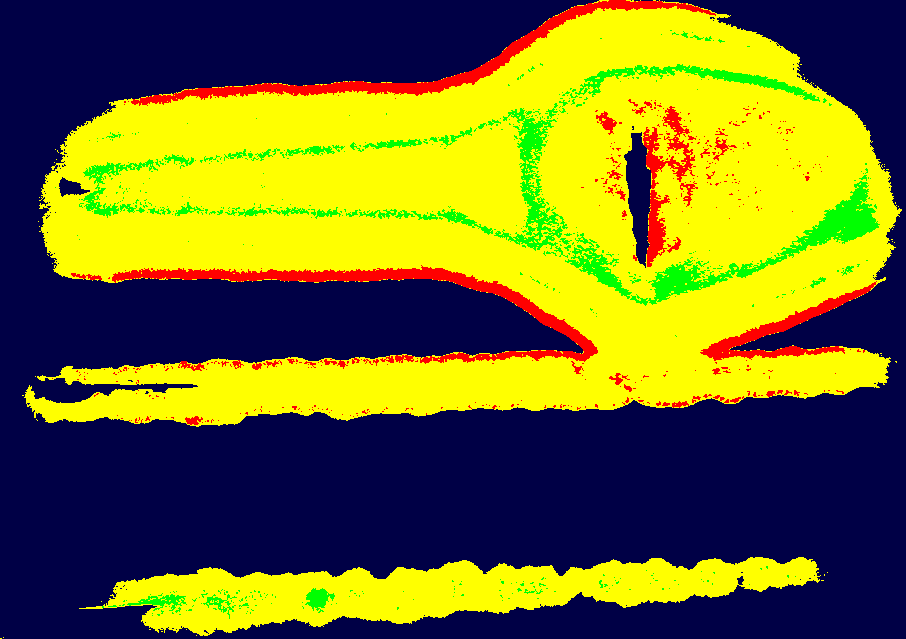

In [153]:
image = Image.open("crocodile.png") # get image
pixels = image.load() # create the pixel map

for i in range(image.size[0]): # for every pixel:
    for j in range(image.size[1]):
        if pixels[i,j] == (0,0,0,255): # if not black:
            pixels[i,j] = (0,0,70,255) # change to white
        elif pixels[i,j] == (255,255,255,255):
            pixels[i,j] = (0,0,70,255)
image

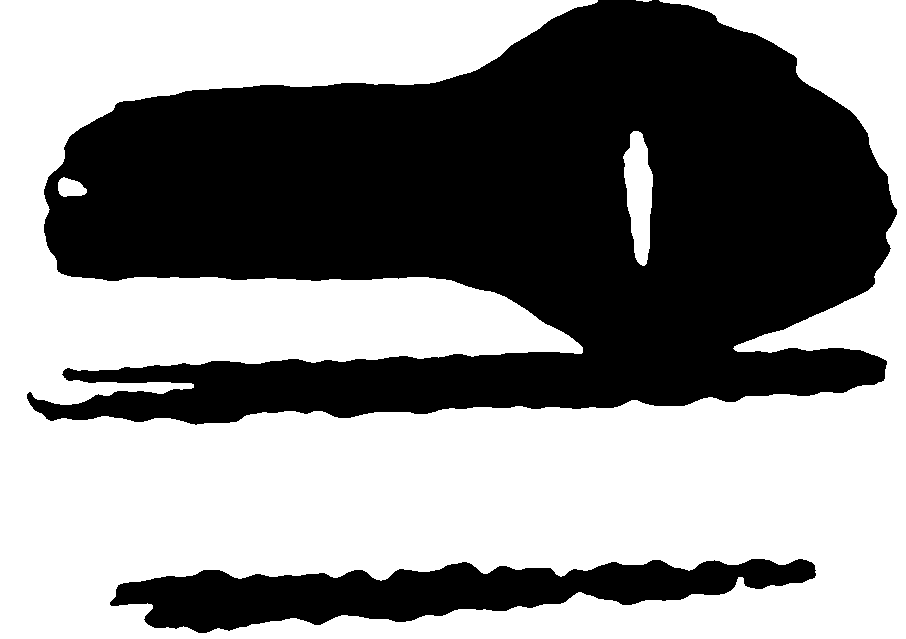

In [155]:
# Setup variable: tune until output looks great 
FILTER_SIZE =3
LOW_TH = 20
UPPER_TH = 100
multibands = image.split() #split into RGB (cells almost have no blue).
blue = multibands[2]
blue = blue.filter(ImageFilter.GaussianBlur(FILTER_SIZE)) #smooth: gaussian filter to difuminate (quitar puntitos y agujeritos). higher filter --> smoother
blue_th = blue.point(lambda i: i > LOW_TH and i < UPPER_TH and 255)
display(blue_th)

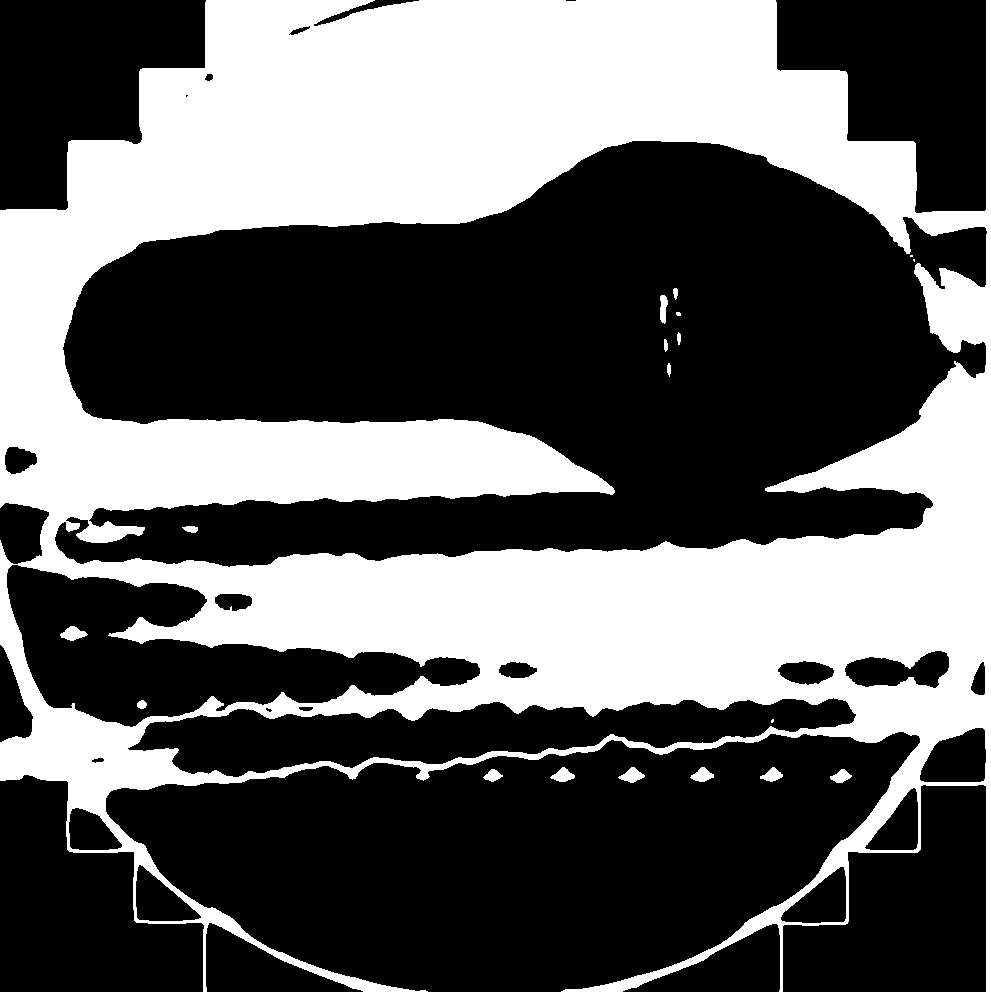

In [66]:
blue_th



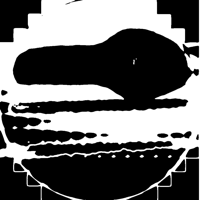

[[0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]]


In [29]:
SIZE = 200

#To retain the shape
wpercent = (SIZE/float(image.size[0]))
hsize = int((float(image.size[1])*float(wpercent)))
img = blue_th.resize((SIZE, hsize))

# To make it square
# img = blue_th.resize((SIZE,SIZE), Image.ANTIALIAS)

display(img)

image_array = np.array(img)
image_array = image_array > 1

side_len = max(image_array.shape)
square_array = np.zeros((side_len, side_len))
square_array[:image_array.shape[0], :image_array.shape[1]] = image_array

print(square_array)

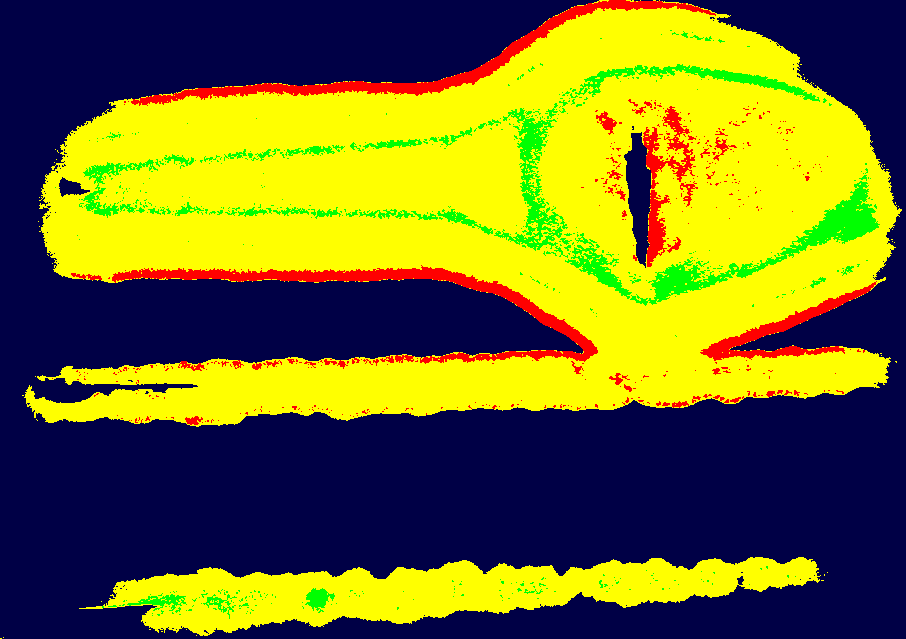

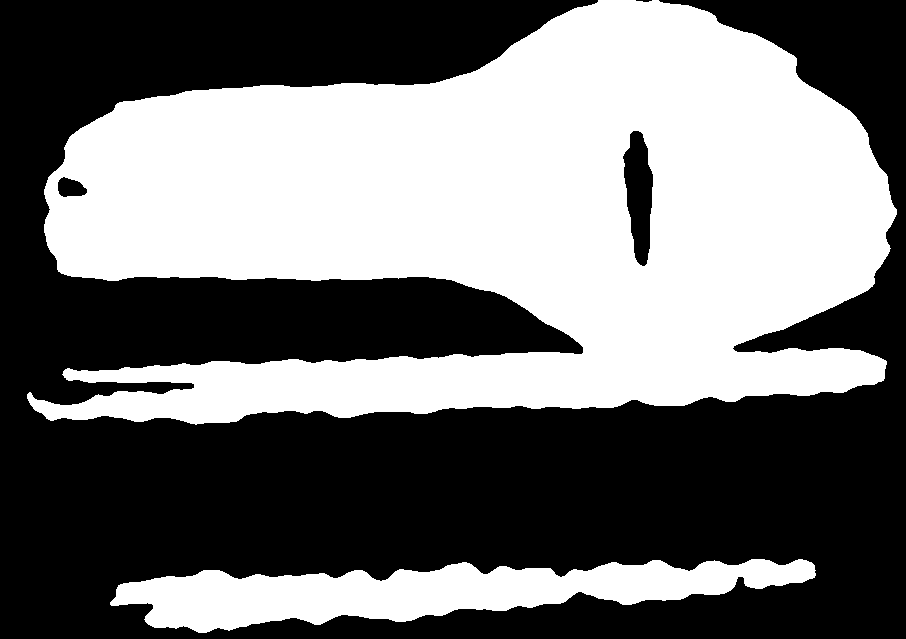

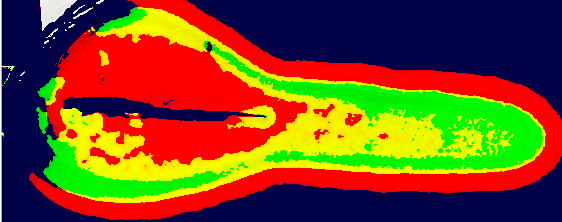

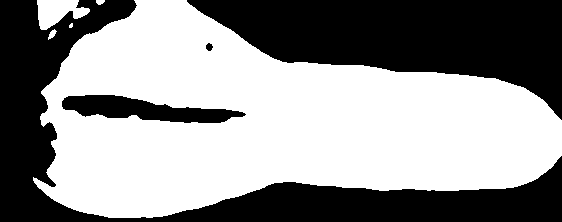

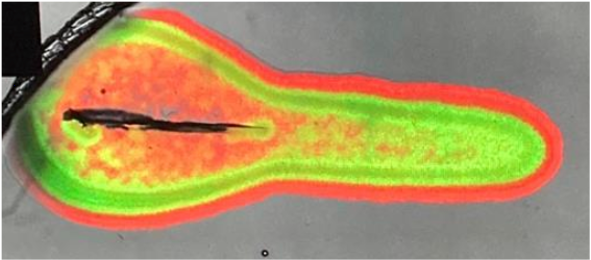

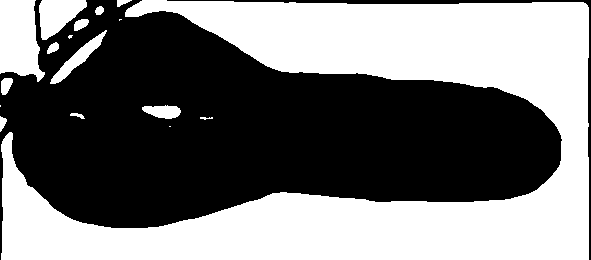

In [224]:
def openimage(shape_name, size, filter_size = 3, lower_threshold = 20, upper_threshold = 100):
    image = Image.open('%s.png'%shape_name)

    #remove black or white pixels and turn them blue
    pixels = image.load() # create the pixel map
    for i in range(image.size[0]): # for every pixel:
        for j in range(image.size[1]):
            if pixels[i,j] == (0,0,0,255): # if not black:
                pixels[i,j] = (0,0,70,255) # change to white
            elif pixels[i,j] == (255,255,255,255):
                pixels[i,j] = (0,0,70,255)
    display(image)
    #convert blue pixels into white and the rest into black (detect cells)
    multibands = image.split() #split into RGB (cells almost have no blue).
    blue = multibands[2]
    blue = blue.filter(ImageFilter.GaussianBlur(filter_size)) #smooth: gaussian filter to difuminate (quitar puntitos y agujeritos). higher filter --> smoother
    blue_th = blue.point(lambda i: i > lower_threshold and i < upper_threshold and 255)
    blue_th = ImageChops.invert(blue_th) 
    display(blue_th)

    #To retain the shape
    wpercent = (size/float(image.size[0]))
    hsize = int((float(image.size[1])*float(wpercent)))
    img = blue_th.resize((size, hsize))

    # To make it square
    image_array = np.array(img)
    image_array = image_array > 1

    side_len = max(image_array.shape)
    square_array = np.zeros((side_len, side_len))
    square_array[:image_array.shape[0], :image_array.shape[1]] = image_array
    return square_array


square_array = openimage('crocodile',10)

square_array = openimage('realshmoo_edited',10)
square_array = openimage('realshmoo',10)




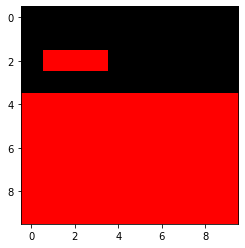

In [225]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# random data|
x =square_array

fig, ax = plt.subplots()

# define the colors
cmap = mpl.colors.ListedColormap(['r', 'k'])

# create a normalize object the describes the limits of
# each color
bounds = [0., 0.5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# plot it
ax.imshow(x, interpolation='none', cmap=cmap, norm=norm)
plt.imsave('h.png', square_array)

In [26]:
square_array

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])